# SREE RAM ROSHAN A S - 24BAD113

# Scenario - 1

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
import pandas as pd
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [27]:
df['final_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

In [28]:
np.random.seed(42)
df['study_hours'] = np.random.randint(2, 10, size=len(df))
df['attendance'] = np.random.randint(60, 100, size=len(df))
df['sleep_hours'] = np.random.randint(5, 9, size=len(df))

In [29]:
le = LabelEncoder()
df['parental_level_encoded'] = le.fit_transform(df['parental level of education'])
df['test_prep_encoded'] = le.fit_transform(df['test preparation course'])

In [30]:
features = ['study_hours', 'attendance', 'parental_level_encoded', 'test_prep_encoded', 'sleep_hours']
X = df[features]
y = df['final_score']

In [31]:
X = X.fillna(X.mean())

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 209.20
RMSE: 14.46
R2 Score: 0.02


In [37]:
importance = pd.DataFrame({'Feature': features, 'Weight': model.coef_})
print("\nCoefficient Analysis:")
print(importance)


Coefficient Analysis:
                  Feature    Weight
0             study_hours -0.579168
1              attendance  0.001080
2  parental_level_encoded -1.037840
3       test_prep_encoded -3.835475
4             sleep_hours  0.048517


In [38]:
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
print(f"\nRidge Score: {ridge.score(X_test, y_test):.2f}")
print(f"Lasso Score: {lasso.score(X_test, y_test):.2f}")


Ridge Score: 0.02
Lasso Score: 0.02


Text(0.5, 1.0, 'Predicted vs Actual')

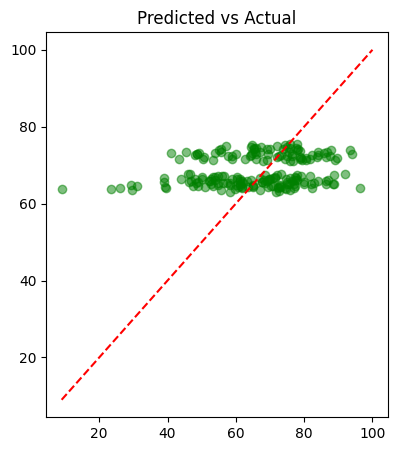

In [39]:
plt.figure(figsize=(15, 5))

# Plot 1: Predicted vs Actual
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Predicted vs Actual')

Text(0.5, 1.0, 'Feature Influence')

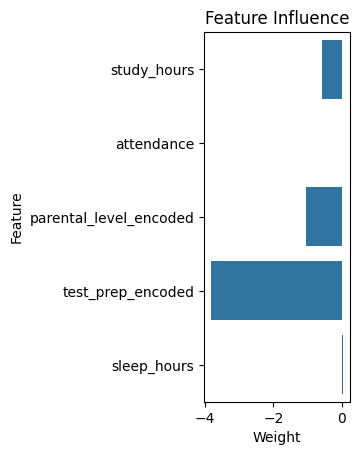

In [40]:
plt.subplot(1, 3, 2)
sns.barplot(x='Weight', y='Feature', data=importance)
plt.title('Feature Influence')

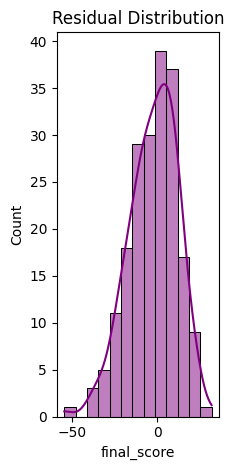

In [41]:
plt.subplot(1, 3, 3)
sns.histplot((y_test - y_pred), kde=True, color='purple')
plt.title('Residual Distribution')

plt.tight_layout()
plt.show()

# Scenario - 2

In [42]:
df_mpg = pd.read_csv('/kaggle/input/datasets/organizations/uciml/autompg-dataset/auto-mpg.csv')

In [43]:
df_mpg['horsepower'] = pd.to_numeric(df_mpg['horsepower'], errors='coerce')

df_mpg = df_mpg.dropna(subset=['horsepower'])

X = df_mpg[['horsepower']]
y = df_mpg['mpg']

In [44]:
degrees = [2, 3, 4]
results = []

plt.figure(figsize=(18, 5))

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


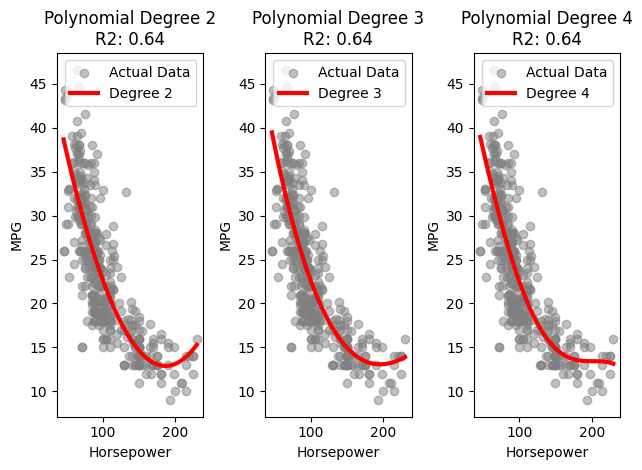

In [45]:
for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_poly)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred) # For error comparison
    
    results.append({'Degree': degree, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'Train_MSE': train_mse})
    
    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color='gray', alpha=0.5, label='Actual Data')
    
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    x_range_poly = poly.transform(x_range)
    x_range_scaled = scaler.transform(x_range_poly)
    y_range_pred = model.predict(x_range_scaled)
    
    plt.plot(x_range, y_range_pred, color='red', linewidth=3, label=f'Degree {degree}')
    plt.title(f'Polynomial Degree {degree}\nR2: {r2:.2f}')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()

plt.tight_layout()
plt.show()

In [46]:
df_results = pd.DataFrame(results)
print("Performance Comparison")
print(df_results)

Performance Comparison
   Degree        MSE      RMSE        R2  Train_MSE
0       2  18.416968  4.291499  0.639170  19.204614
1       3  18.460267  4.296541  0.638322  19.143788
2       4  18.268227  4.274135  0.642084  19.126191


In [47]:
poly4 = PolynomialFeatures(degree=4)
X_p4 = poly4.fit_transform(X)
X_s4 = StandardScaler().fit_transform(X_p4)
X_tr4, X_te4, y_tr4, y_te4 = train_test_split(X_s4, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=10)
ridge.fit(X_tr4, y_tr4)
print(f"\nRidge Regression (Deg 4) R2 Score: {ridge.score(X_te4, y_te4):.2f}")


Ridge Regression (Deg 4) R2 Score: 0.64


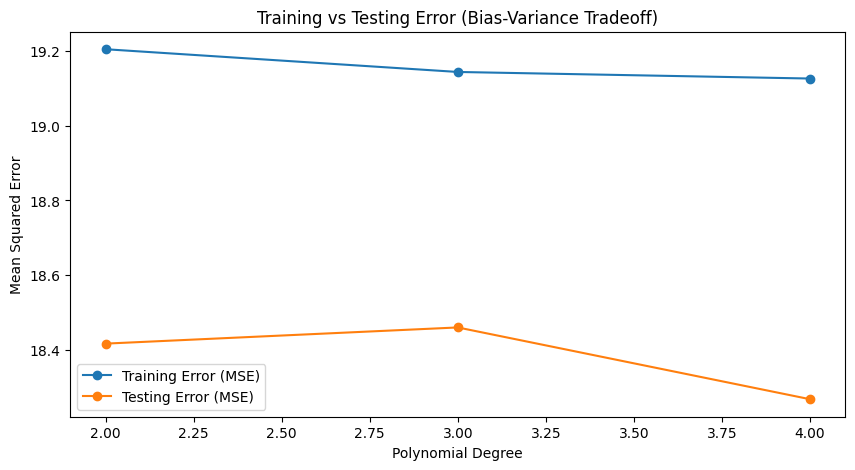

In [48]:
plt.figure(figsize=(10, 5))

plt.plot(df_results['Degree'], df_results['Train_MSE'], label='Training Error (MSE)', marker='o')
plt.plot(df_results['Degree'], df_results['MSE'], label='Testing Error (MSE)', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training vs Testing Error (Bias-Variance Tradeoff)')
plt.legend()
plt.show()